<a href="https://colab.research.google.com/github/worawit-saetan/Kaggle-Late-Competition---Facial-Keypoints-Detection/blob/main/Kaggle_Late_Competition_Facial_Keypoints_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Late Competition - Facial Keypoints Detection
Detect the location of keypoints on face images

## Outline is as follows
+ load the data set and check
+ delete images which have incomplete information (missing some y columns)
+ turn image string value into numeric value

+ split train/ validation /test set

+ normalize the data by dividing 255.0

+ reshape the image data and add repeat channel axis

+ do the data augmentation

+ download Mobilenet as a model base and create our own custom on top of that

+ freeze base model and train (feature extraction)

+ plot model metric and val matric (RMSE)

+ fine tune the model by unfreezing some based layers and train our model with decreasing learning rate

+ plot model metric and val matric (RMSE)

+ evaluate the model with test set

+ save the model

+ use our model to predict the kaggle test data

+ create the submission file 

+ due to some prediction values that exceeds the constraint range of 0-96 (pixels), we edit these values with maximum value (96)


In [1]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/training.csv')


In [2]:
dataset

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921,71 74 85 105 116 128 139 150 170 187 201 209 2...
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023,60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120,74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,...,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447,254 254 254 254 254 238 193 145 121 118 119 10...


In [3]:
dataset.shape

(7049, 31)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [5]:
dataset = dataset.dropna()

In [6]:
dataset.shape

(2140, 31)

In [7]:
dataset

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2278,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2281,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2282,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,...,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


In [8]:
dataset = dataset.reset_index()

In [9]:
X_string_of_number = dataset['Image']
Y = dataset.drop(['Image','index'],axis=1) 

In [10]:
X_string_of_number

0       238 236 237 238 240 240 239 241 241 243 240 23...
1       219 215 204 196 204 211 212 200 180 168 178 19...
2       144 142 159 180 188 188 184 180 167 132 84 59 ...
3       193 192 193 194 194 194 193 192 168 111 50 12 ...
4       147 148 160 196 215 214 216 217 219 220 206 18...
                              ...                        
2135    191 191 191 190 189 185 184 120 54 34 19 24 31...
2136    19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137    31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138    7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...
2139    68 19 19 23 19 26 23 16 8 15 9 9 17 16 15 27 2...
Name: Image, Length: 2140, dtype: object

In [11]:
Y

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,45.805390,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,53.649433,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,53.318891,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,...,54.075935,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543


In [12]:
X_string_of_number.shape

(2140,)

In [13]:
import numpy as np


In [14]:
total_images = X_string_of_number.shape[0]

In [15]:
image_size = 96*96

In [16]:
X = np.zeros((total_images,image_size))
X.shape

(2140, 9216)

In [17]:
for i in range(0,total_images):
  X[i,:] = np.array([int(n) for n in X_string_of_number[i].split()])

In [18]:
X

array([[238., 236., 237., ...,  70.,  75.,  90.],
       [219., 215., 204., ...,   1.,   1.,   1.],
       [144., 142., 159., ...,  78.,  78.,  77.],
       ...,
       [ 31.,  40.,  47., ...,  39.,  51.,  75.],
       [  7.,   1.,   5., ..., 179., 177.,  57.],
       [ 68.,  19.,  19., ..., 125., 124., 119.]])

In [19]:
X.shape

(2140, 9216)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [21]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1712, 9216)
(428, 9216)
(1712, 30)
(428, 30)


In [22]:
X_test.shape[0]

428

In [23]:
validation_size = X_test.shape[0]
validation_size

428

In [24]:
X_validation = X_train[:validation_size]
partial_X_train = X_train[validation_size:]

In [25]:
Y_validation = Y_train[:validation_size]
partial_Y_train = Y_train[validation_size:]

In [26]:
print(X_validation.shape)
print(partial_X_train.shape)
print(Y_validation.shape)
print(partial_Y_train.shape)

(428, 9216)
(1284, 9216)
(428, 30)
(1284, 30)


In [27]:
X_validation /= 255.0
partial_X_train /= 255.0
X_test /= 255.0

In [28]:
partial_Y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 654 to 1999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          1284 non-null   float64
 1   left_eye_center_y          1284 non-null   float64
 2   right_eye_center_x         1284 non-null   float64
 3   right_eye_center_y         1284 non-null   float64
 4   left_eye_inner_corner_x    1284 non-null   float64
 5   left_eye_inner_corner_y    1284 non-null   float64
 6   left_eye_outer_corner_x    1284 non-null   float64
 7   left_eye_outer_corner_y    1284 non-null   float64
 8   right_eye_inner_corner_x   1284 non-null   float64
 9   right_eye_inner_corner_y   1284 non-null   float64
 10  right_eye_outer_corner_x   1284 non-null   float64
 11  right_eye_outer_corner_y   1284 non-null   float64
 12  left_eyebrow_inner_end_x   1284 non-null   float64
 13  left_eyebrow_inner_end_y   1284 non-null   flo

In [29]:
partial_Y_train

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
654,66.794024,38.749301,30.093687,36.940337,61.883566,38.490795,75.322988,40.300337,36.813687,37.198843,...,45.342651,62.268723,62.400578,73.899181,35.779663,71.572627,48.444145,70.539181,48.702651,81.911133
855,66.894199,37.878040,31.094464,37.310305,61.780132,37.878040,73.145007,38.730596,37.061086,37.878040,...,47.858225,63.165457,61.780132,70.268821,35.924344,68.847894,49.562702,65.722490,49.562702,78.224106
538,66.633521,39.710360,28.828562,37.570512,60.926678,40.423696,72.696595,41.137031,34.178380,38.997104,...,47.017785,60.039669,64.493752,83.221686,33.108099,84.291967,47.731041,77.158612,48.444298,90.712066
927,67.999385,36.861138,28.396615,37.273662,60.868615,36.705046,75.012923,38.098708,34.997538,37.273662,...,50.260615,52.537292,68.412000,71.513538,32.109231,73.164000,49.435385,68.213538,50.673231,78.939692
1701,65.653644,36.267444,31.367930,37.247036,60.149271,37.456949,71.717784,37.177065,38.434985,38.389893,...,47.314286,59.446453,63.877888,75.650820,34.865799,76.468494,49.399417,74.091351,49.565274,77.864593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,67.265047,37.827140,28.772636,36.222953,61.651738,37.225570,73.279402,39.831925,34.586467,36.624000,...,47.617794,51.259065,63.456000,76.921121,30.175850,76.319551,46.620112,72.259290,46.415103,83.737570
2049,66.458460,37.012772,31.304806,37.707966,54.454773,39.005662,75.704542,38.240948,38.233575,39.816722,...,37.909151,61.901339,60.848804,81.753785,33.214834,81.116524,40.900592,81.193768,41.634409,82.101382
2073,66.908371,34.813361,31.646351,40.867629,58.254408,37.461477,74.283358,34.261253,39.136545,41.886135,...,44.700358,60.833439,73.654197,71.207069,35.888071,76.702209,51.725479,77.116937,54.293679,82.549867
474,64.948966,35.833225,31.810428,37.016739,59.327338,36.720861,70.867200,36.129103,36.840166,37.904441,...,48.675310,57.432497,63.765848,72.227090,34.769214,72.818979,49.563145,70.451421,50.155034,81.399393


In [30]:
Y_validation

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
2029,60.244898,38.489187,26.361255,35.067926,55.604264,40.110338,71.320134,39.739263,38.971672,39.585745,...,48.524259,62.316453,54.291305,75.906156,29.073394,74.876853,45.487093,76.578878,45.487093,78.012549
2093,64.875220,36.051772,28.810624,39.774221,57.807962,37.670228,72.697758,36.834025,36.848956,40.745294,...,46.946445,55.854520,66.992724,72.004259,31.852351,74.317421,49.078024,73.259272,49.225673,79.731204
1433,67.088176,35.492923,29.015209,34.781187,57.481143,37.449846,76.695560,37.805714,37.554989,36.916044,...,46.272703,61.111912,62.284659,80.326330,30.972484,78.902857,47.340308,77.657670,47.518242,87.976440
295,64.918419,38.881725,28.223425,36.297772,58.457677,39.399090,71.378587,39.915880,33.908695,37.331353,...,45.278659,59.813174,56.907305,83.587257,32.616431,82.295569,45.278659,77.385772,45.278659,92.373269
1255,65.016930,39.553860,27.615628,39.374140,57.105116,38.654884,74.007814,39.194419,36.066977,39.733953,...,46.496000,58.434605,65.197023,79.472744,29.953116,80.192000,47.575070,75.337302,47.575070,85.047070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,68.740421,33.610105,28.659789,34.739368,62.813053,34.739368,76.079368,35.304000,35.716421,35.586316,...,51.240632,54.497684,65.353263,75.949263,35.998737,75.102316,51.240632,68.892632,50.958316,84.416842
1955,65.398359,35.718578,32.174374,35.694004,57.351372,37.101108,73.335746,37.070145,39.434503,36.978239,...,47.879096,55.321005,63.016054,69.729299,33.091039,69.470768,48.581381,69.880109,48.644794,74.680823
1620,62.292345,37.215925,30.321711,39.569634,56.577333,38.530115,70.452152,36.845003,36.411400,39.656965,...,48.172869,55.023609,62.784000,68.967529,33.141628,71.251515,48.170295,71.330113,48.570468,73.244351
1068,65.252571,36.546377,29.704229,37.363566,61.166629,36.954971,71.861943,37.177874,35.424914,37.772160,...,48.908800,50.030171,62.800457,74.137600,37.058743,74.954971,49.725257,66.783086,50.133943,82.718171


In [31]:
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics

In [32]:
partial_X_train

array([[0.69803922, 0.69803922, 0.69411765, ..., 0.64705882, 0.66666667,
        0.65882353],
       [0.81568627, 0.81568627, 0.81960784, ..., 0.42745098, 0.54901961,
        0.59607843],
       [0.30980392, 0.30980392, 0.32156863, ..., 0.49803922, 0.50196078,
        0.50196078],
       ...,
       [0.99607843, 0.99215686, 0.99215686, ..., 0.50588235, 0.49803922,
        0.51764706],
       [0.78431373, 0.78431373, 0.78431373, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.20784314, 0.21568627, 0.43137255, ..., 0.09803922, 0.11764706,
        0.14901961]])

In [33]:
partial_X_train.shape

(1284, 9216)

In [34]:
partial_X_train.reshape((-1,96,96,1)).shape

(1284, 96, 96, 1)

In [35]:
partial_X_train = partial_X_train.reshape((-1,96,96,1))
X_validation = X_validation.reshape((-1,96,96,1))
X_test = X_test.reshape((-1,96,96,1))

In [36]:
print(partial_X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(1284, 96, 96, 1)
(428, 96, 96, 1)
(428, 96, 96, 1)


In [40]:
from keras.applications import MobileNetV2

MobileNetV2_base = MobileNetV2(
    input_shape=(96,96,3),
    include_top=False,
    weights="imagenet")

9406464/9406464 [==============================] - 0s 0us/step


In [41]:
MobileNetV2_base.summary()

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 48, 48, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 48, 48, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 48, 48, 32)   0           ['bn_Conv1[0][0]']               
                                                                                

In [42]:
custom_MobileNetV2 = models.Sequential()
custom_MobileNetV2.add(MobileNetV2_base)

custom_MobileNetV2.add(layers.Flatten())
custom_MobileNetV2.add(layers.Dropout(0.4))

custom_MobileNetV2.add(layers.Dense(512, activation='relu'))
custom_MobileNetV2.add(layers.Dense(30))

In [43]:
custom_MobileNetV2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 11520)             0         
                                                                 
 dropout (Dropout)           (None, 11520)             0         
                                                                 
 dense (Dense)               (None, 512)               5898752   
                                                                 
 dense_1 (Dense)             (None, 30)                15390     
                                                                 
Total params: 8,172,126
Trainable params: 8,138,014
Non-trainable params: 34,112
_________________________________________

In [53]:
MobileNetV2_base.trainable = False

In [54]:
custom_MobileNetV2.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='mse', metrics=metrics.RootMeanSquaredError() )

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [47]:
partial_X_train.shape

(1284, 96, 96, 1)

In [48]:
partial_X_train.repeat(3, axis=-1).shape

(1284, 96, 96, 3)

In [49]:
partial_X_train_3_channels = partial_X_train.repeat(3, axis=-1)
X_validation_3_channels = X_validation.repeat(3, axis=-1)
X_test_3_channels = X_test.repeat(3, axis=-1)

In [50]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
  )
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
  partial_X_train_3_channels,
  partial_Y_train,
  batch_size=32,
  shuffle=False)

validation_generator = test_datagen.flow(
  X_validation_3_channels,
  Y_validation,
  batch_size=32,
  shuffle=False)

In [55]:
history = custom_MobileNetV2.fit_generator(
  train_generator,
  steps_per_epoch=partial_X_train.shape[0]//32+1,
  epochs=100,
  validation_data=validation_generator,
  validation_steps=X_validation.shape[0]//32+1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


41/41 [==============================] - 7s 100ms/step - loss: 2040.7817 - root_mean_squared_error: 45.1750 - val_loss: 1703.4384 - val_root_mean_squared_error: 41.2727
Epoch 2/100
41/41 [==============================] - 3s 80ms/step - loss: 1211.3040 - root_mean_squared_error: 34.8038 - val_loss: 1059.6776 - val_root_mean_squared_error: 32.5527
Epoch 3/100
41/41 [==============================] - 3s 82ms/step - loss: 612.7551 - root_mean_squared_error: 24.7539 - val_loss: 563.5763 - val_root_mean_squared_error: 23.7398
Epoch 4/100
41/41 [==============================] - 3s 81ms/step - loss: 238.8771 - root_mean_squared_error: 15.4556 - val_loss: 245.9701 - val_root_mean_squared_error: 15.6834
Epoch 5/100
41/41 [==============================] - 3s 82ms/step - loss: 76.4766 - root_mean_squared_error: 8.7451 - val_loss: 118.0995 - val_root_mean_squared_error: 10.8674
Epoch 6/100
41/41 [==============================] - 3s 82ms/step - loss: 45.3538 - root_mean_squared_error: 6.7345 - v

In [62]:
custom_MobileNetV2.evaluate(X_test_3_channels, Y_test, batch_size=32)

14/14 [==============================] - 0s 18ms/step - loss: 16.3672 - root_mean_squared_error: 4.0456


[16.367202758789062, 4.045640468597412]

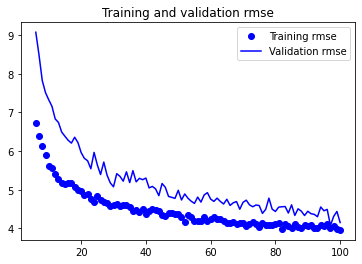

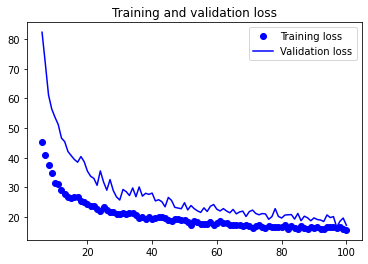

In [67]:
import matplotlib.pyplot as plt
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(6, len(rmse) + 1)
plt.plot(epochs, rmse[5:], 'bo', label='Training rmse')
plt.plot(epochs, val_rmse[5:], 'b', label='Validation rmse')
plt.title('Training and validation rmse')
plt.legend()
plt.figure()
plt.plot(epochs, loss[5:], 'bo', label='Training loss')
plt.plot(epochs, val_loss[5:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [68]:
MobileNetV2_base.trainable = True
set_trainable = False

for layer in MobileNetV2_base.layers:
  if layer.name == 'block_16_expand':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [69]:
custom_MobileNetV2.compile(optimizer=optimizers.RMSprop(lr=1e-5), loss='mse', metrics=metrics.RootMeanSquaredError() )

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [70]:
history = custom_MobileNetV2.fit_generator(
  train_generator,
  steps_per_epoch=partial_X_train.shape[0]//32+1,
  epochs=30,
  validation_data=validation_generator,
  validation_steps=X_validation.shape[0]//32+1)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


41/41 [==============================] - 9s 106ms/step - loss: 163.8484 - root_mean_squared_error: 12.8003 - val_loss: 38.4914 - val_root_mean_squared_error: 6.2041
Epoch 2/30
41/41 [==============================] - 3s 84ms/step - loss: 60.3577 - root_mean_squared_error: 7.7690 - val_loss: 106.6977 - val_root_mean_squared_error: 10.3295
Epoch 3/30
41/41 [==============================] - 3s 83ms/step - loss: 42.9332 - root_mean_squared_error: 6.5523 - val_loss: 134.9207 - val_root_mean_squared_error: 11.6155
Epoch 4/30
41/41 [==============================] - 3s 83ms/step - loss: 36.3087 - root_mean_squared_error: 6.0257 - val_loss: 121.3495 - val_root_mean_squared_error: 11.0159
Epoch 5/30
41/41 [==============================] - 3s 83ms/step - loss: 36.4007 - root_mean_squared_error: 6.0333 - val_loss: 117.6440 - val_root_mean_squared_error: 10.8464
Epoch 6/30
41/41 [==============================] - 4s 86ms/step - loss: 34.2748 - root_mean_squared_error: 5.8545 - val_loss: 102.3313

In [71]:
custom_MobileNetV2.evaluate(X_test_3_channels, Y_test, batch_size=32)

14/14 [==============================] - 1s 18ms/step - loss: 19.5983 - root_mean_squared_error: 4.4270


[19.598297119140625, 4.426996231079102]

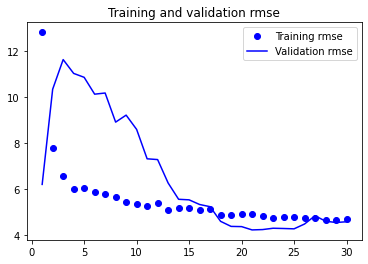

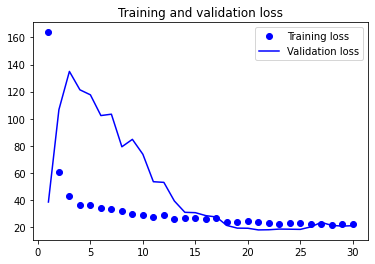

In [72]:
import matplotlib.pyplot as plt
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(rmse) + 1)
plt.plot(epochs, rmse, 'bo', label='Training rmse')
plt.plot(epochs, val_rmse, 'b', label='Validation rmse')
plt.title('Training and validation rmse')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [73]:
custom_MobileNetV2.save('custom_MobileNetV2.h5')

In [74]:
test_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
test_file

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
...,...,...
1778,1779,101 101 101 100 100 97 97 98 102 149 214 206 1...
1779,1780,201 191 171 158 145 140 136 130 123 115 108 10...
1780,1781,28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...
1781,1782,104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...


In [75]:
X_realworld_string = test_file['Image']
X_realworld_string

0       182 183 182 182 180 180 176 169 156 137 124 10...
1       76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2       177 176 174 170 169 169 168 166 166 166 161 14...
3       176 174 174 175 174 174 176 176 175 171 165 15...
4       50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
                              ...                        
1778    101 101 101 100 100 97 97 98 102 149 214 206 1...
1779    201 191 171 158 145 140 136 130 123 115 108 10...
1780    28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...
1781    104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...
1782    63 61 64 66 66 64 65 70 69 70 77 83 63 34 22 2...
Name: Image, Length: 1783, dtype: object

In [76]:
X_realworld_string.shape

(1783,)

In [77]:
test_file_images = X_realworld_string.shape[0]
test_file_images

1783

In [78]:
X_realworld = np.zeros((test_file_images,image_size))
X_realworld.shape

(1783, 9216)

In [79]:
for i in range(0,test_file_images):
  X_realworld[i,:] = np.array([int(n) for n in X_realworld_string[i].split()])
X_realworld

array([[182., 183., 182., ...,   8.,   5.,   5.],
       [ 76.,  87.,  81., ..., 228., 211., 168.],
       [177., 176., 174., ...,   1.,   1.,   1.],
       ...,
       [ 28.,  28.,  29., ...,  77.,  78.,  78.],
       [104.,  95.,  71., ..., 144., 151., 159.],
       [ 63.,  61.,  64., ..., 113., 112., 113.]])

In [80]:
X_realworld.shape

(1783, 9216)

In [81]:
X_realworld /= 255.0
X_realworld

array([[0.71372549, 0.71764706, 0.71372549, ..., 0.03137255, 0.01960784,
        0.01960784],
       [0.29803922, 0.34117647, 0.31764706, ..., 0.89411765, 0.82745098,
        0.65882353],
       [0.69411765, 0.69019608, 0.68235294, ..., 0.00392157, 0.00392157,
        0.00392157],
       ...,
       [0.10980392, 0.10980392, 0.11372549, ..., 0.30196078, 0.30588235,
        0.30588235],
       [0.40784314, 0.37254902, 0.27843137, ..., 0.56470588, 0.59215686,
        0.62352941],
       [0.24705882, 0.23921569, 0.25098039, ..., 0.44313725, 0.43921569,
        0.44313725]])

In [82]:
X_realworld = X_realworld.reshape((-1,96,96,1))
X_realworld.shape

(1783, 96, 96, 1)

In [83]:
X_realworld_3_channels = X_realworld.repeat(3, axis=-1)
X_realworld_3_channels.shape

(1783, 96, 96, 3)

In [85]:
predictions = custom_MobileNetV2.predict(X_realworld_3_channels)

56/56 [==============================] - 1s 12ms/step


In [94]:
predictions

array([[64.326645, 36.454296, 30.177382, ..., 67.87274 , 47.130264,
        83.51208 ],
       [64.48951 , 36.87262 , 28.856283, ..., 68.8922  , 47.773518,
        81.9746  ],
       [63.9246  , 34.387455, 31.850279, ..., 66.474144, 48.928776,
        77.30828 ],
       ...,
       [67.96134 , 37.482132, 29.948748, ..., 76.09965 , 49.49908 ,
        85.34121 ],
       [64.182396, 36.142673, 32.57373 , ..., 69.84402 , 51.967876,
        81.63016 ],
       [74.14448 , 41.851776, 33.298656, ..., 83.37346 , 55.04929 ,
        92.6229  ]], dtype=float32)

In [86]:
predictions.shape

(1783, 30)

In [97]:
predictions_file = pd.DataFrame(columns=Y.columns,data=predictions)

In [98]:
predictions_file

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,64.326645,36.454296,30.177382,37.280659,59.052055,39.036072,70.965248,39.103230,35.275864,38.446449,...,46.554783,53.267792,60.867966,72.080681,33.944912,72.842766,48.190887,67.872742,47.130264,83.512077
1,64.489510,36.872620,28.856283,34.781017,57.421673,38.337181,69.579292,37.669575,33.552128,36.455387,...,47.075294,52.968067,61.564434,70.970909,30.597031,70.839340,46.586555,68.892197,47.773518,81.974602
2,63.924599,34.387455,31.850279,36.235676,57.550457,37.412369,68.928558,35.026531,36.503201,37.174194,...,47.941303,53.457855,62.545250,69.618118,35.935017,70.406921,48.658241,66.474144,48.928776,77.308281
3,70.300766,40.522438,34.566040,41.252247,62.115284,42.531189,76.717216,41.603249,40.167709,43.663055,...,52.302872,56.686855,67.732460,78.452484,37.297031,79.670044,52.988483,73.037781,54.382877,83.302605
4,72.116997,40.663811,30.700413,39.031513,63.233463,40.001675,77.763023,41.061096,38.521324,40.995766,...,50.460934,56.168182,66.409775,80.999931,36.553627,79.803757,50.586464,73.481125,50.880318,90.277428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,57.345440,33.382549,26.925196,34.768719,52.067577,35.752502,64.422546,36.270710,32.973217,34.641663,...,41.709316,52.136879,54.654533,65.454994,27.437843,65.471924,44.219006,64.438889,42.400059,69.924736
1779,67.124191,37.939922,31.195250,36.911179,59.056126,38.323528,73.782654,40.331078,38.135246,36.177612,...,47.478458,62.520741,63.310513,77.759331,33.617840,78.237885,47.468521,77.585320,46.464314,86.366646
1780,67.961342,37.482132,29.948748,36.819004,60.385628,37.873043,77.782326,38.508839,37.030197,38.043861,...,48.882210,61.567436,64.886070,76.971138,32.207836,78.989120,49.561592,76.099648,49.499081,85.341209
1781,64.182396,36.142673,32.573730,35.949688,60.790051,37.630486,70.390160,37.384956,35.820862,36.877213,...,50.572163,57.677986,62.457611,72.805710,36.315304,73.183357,49.407101,69.844017,51.967876,81.630157


In [99]:
predictions_file['ImageID'] = range(1,len(predictions_file)+1) 

In [100]:
predictions_file

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,ImageID
0,64.326645,36.454296,30.177382,37.280659,59.052055,39.036072,70.965248,39.103230,35.275864,38.446449,...,53.267792,60.867966,72.080681,33.944912,72.842766,48.190887,67.872742,47.130264,83.512077,1
1,64.489510,36.872620,28.856283,34.781017,57.421673,38.337181,69.579292,37.669575,33.552128,36.455387,...,52.968067,61.564434,70.970909,30.597031,70.839340,46.586555,68.892197,47.773518,81.974602,2
2,63.924599,34.387455,31.850279,36.235676,57.550457,37.412369,68.928558,35.026531,36.503201,37.174194,...,53.457855,62.545250,69.618118,35.935017,70.406921,48.658241,66.474144,48.928776,77.308281,3
3,70.300766,40.522438,34.566040,41.252247,62.115284,42.531189,76.717216,41.603249,40.167709,43.663055,...,56.686855,67.732460,78.452484,37.297031,79.670044,52.988483,73.037781,54.382877,83.302605,4
4,72.116997,40.663811,30.700413,39.031513,63.233463,40.001675,77.763023,41.061096,38.521324,40.995766,...,56.168182,66.409775,80.999931,36.553627,79.803757,50.586464,73.481125,50.880318,90.277428,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,57.345440,33.382549,26.925196,34.768719,52.067577,35.752502,64.422546,36.270710,32.973217,34.641663,...,52.136879,54.654533,65.454994,27.437843,65.471924,44.219006,64.438889,42.400059,69.924736,1779
1779,67.124191,37.939922,31.195250,36.911179,59.056126,38.323528,73.782654,40.331078,38.135246,36.177612,...,62.520741,63.310513,77.759331,33.617840,78.237885,47.468521,77.585320,46.464314,86.366646,1780
1780,67.961342,37.482132,29.948748,36.819004,60.385628,37.873043,77.782326,38.508839,37.030197,38.043861,...,61.567436,64.886070,76.971138,32.207836,78.989120,49.561592,76.099648,49.499081,85.341209,1781
1781,64.182396,36.142673,32.573730,35.949688,60.790051,37.630486,70.390160,37.384956,35.820862,36.877213,...,57.677986,62.457611,72.805710,36.315304,73.183357,49.407101,69.844017,51.967876,81.630157,1782


In [102]:
predictions_file.to_csv('/content/drive/MyDrive/Colab Notebooks/predictions_file_Index_False.csv',index= False) 

In [104]:
IdLookupTable = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IdLookupTable.csv')
IdLookupTable

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
...,...,...,...,...
27119,27120,1783,right_eye_center_y,NaN
27120,27121,1783,nose_tip_x,NaN
27121,27122,1783,nose_tip_y,NaN
27122,27123,1783,mouth_center_bottom_lip_x,NaN


In [106]:
submission = IdLookupTable.copy()
submission

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
...,...,...,...,...
27119,27120,1783,right_eye_center_y,NaN
27120,27121,1783,nose_tip_x,NaN
27121,27122,1783,nose_tip_y,NaN
27122,27123,1783,mouth_center_bottom_lip_x,NaN


In [105]:
len(submission)

27124

In [117]:
predictions_file[predictions_file['ImageID']== submission['ImageId'][0]][submission['FeatureName'][0]]

0    64.326645
Name: left_eye_center_x, dtype: float32

In [118]:
for i in range(0,len(submission)):
  submission['Location'][i] = predictions_file[predictions_file['ImageID']== submission['ImageId'][i]] [submission['FeatureName'][i]]
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [119]:
submission

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,64.326645
1,2,1,left_eye_center_y,36.454296
2,3,1,right_eye_center_x,30.177382
3,4,1,right_eye_center_y,37.280659
4,5,1,left_eye_inner_corner_x,59.052055
...,...,...,...,...
27119,27120,1783,right_eye_center_y,39.445957
27120,27121,1783,nose_tip_x,53.576473
27121,27122,1783,nose_tip_y,65.146957
27122,27123,1783,mouth_center_bottom_lip_x,55.049290


In [122]:
submission = submission.drop(['ImageId','FeatureName'],axis=1)

In [123]:
submission

,RowId,Location
0,1,64.326645
1,2,36.454296
2,3,30.177382
3,4,37.280659
4,5,59.052055
...,...,...
27119,27120,39.445957
27120,27121,53.576473
27121,27122,65.146957
27122,27123,55.049290


In [170]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/submission.csv',index= False) 

In [144]:
edit_submission = submission.copy()
edit_submission

,RowId,Location
0,1,64.326645
1,2,36.454296
2,3,30.177382
3,4,37.280659
4,5,59.052055
...,...,...
27119,27120,39.445957
27120,27121,53.576473
27121,27122,65.146957
27122,27123,55.049290


In [145]:
edit_submission[edit_submission['Location']>96]

,RowId,Location
17791,17792,99.419479
17967,17968,102.057480
18951,18952,101.746429
19349,19350,98.547157
21035,21036,96.576080
21987,21988,105.040657
24443,24444,97.062813
26195,26196,100.394173
26203,26204,108.209618
26459,26460,96.249084


In [146]:
edit_submission[edit_submission['Location']>96]['RowId']

17791    17792
17967    17968
18951    18952
19349    19350
21035    21036
21987    21988
24443    24444
26195    26196
26203    26204
26459    26460
26843    26844
Name: RowId, dtype: int64

In [147]:
edit_submission[edit_submission['Location']>96]['Location']

17791     99.419479
17967    102.057480
18951    101.746429
19349     98.547157
21035     96.576080
21987    105.040657
24443     97.062813
26195    100.394173
26203    108.209618
26459     96.249084
26843     97.161491
Name: Location, dtype: float64

In [150]:
edit_submission[edit_submission['Location']>96]['Location'].index

Int64Index([17791, 17967, 18951, 19349, 21035, 21987, 24443, 26195, 26203,
            26459, 26843],
           dtype='int64')

In [160]:
edit_index = edit_submission[edit_submission['Location']>96]['Location'].index

In [161]:
edit_submission.loc[edit_index]['Location']

17791     99.419479
17967    102.057480
18951    101.746429
19349     98.547157
21035     96.576080
21987    105.040657
24443     97.062813
26195    100.394173
26203    108.209618
26459     96.249084
26843     97.161491
Name: Location, dtype: float64

In [166]:
edit_submission.loc[edit_index,'Location'] = 96.0

In [167]:
edit_submission.loc[edit_index,'Location']

17791    96.0
17967    96.0
18951    96.0
19349    96.0
21035    96.0
21987    96.0
24443    96.0
26195    96.0
26203    96.0
26459    96.0
26843    96.0
Name: Location, dtype: float64

In [169]:
edit_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/edit_submission.csv',index= False) 

Our score on kaggle is 5.42342 (RMSE)

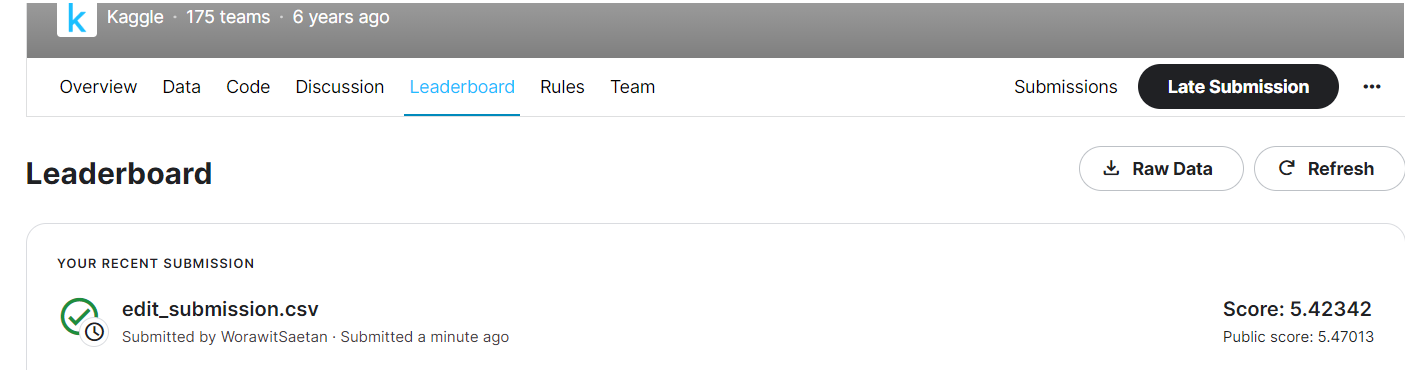